# EDA 

In [10]:
import pandas as pd 
import mplfinance as mpf


In [11]:
df = pd.read_csv(
    "C:/Users/USER/Documents/QQQ Project/data/processed/full_QQQ_data.csv")

df.head()

,Date,Open,High,Low,Close,Volume
0,1999-03-10,51.12500,51.156250,50.28125,43.478279,5232000
1,1999-03-11,51.43750,51.734375,50.31250,43.691170,9688600
2,1999-03-12,51.12500,51.156250,49.65625,42.626823,8743600
3,1999-03-15,50.43750,51.562500,49.90625,43.850815,6369000
4,1999-03-16,51.71875,52.156250,51.15625,44.223331,4905800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6712 non-null   object 
 1   Open    6712 non-null   float64
 2   High    6712 non-null   float64
 3   Low     6712 non-null   float64
 4   Close   6712 non-null   float64
 5   Volume  6712 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 314.8+ KB


In [13]:
df.index
type(df.index)


pandas.core.indexes.range.RangeIndex

# Clean Data

In [14]:
#  Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#  Drop rows where Date failed to parse
df = df.dropna(subset=['Date'])

#  Set Date as index
df = df.set_index('Date')

#  Sort by time (important)
df = df.sort_index()

#  Keep only the correct columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [15]:
# Fix Object OHLC
df[['Open','High','Low','Close','Volume']] = df[['Open','High','Low','Close','Volume']].apply(
    pd.to_numeric, errors='coerce'
)


In [17]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
df.to_csv((
    "C:/Users/USER/Documents/QQQ Project/data/processed/full_QQQ_data.csv"))

c:\Users\USER\Documents\QQQ Project\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


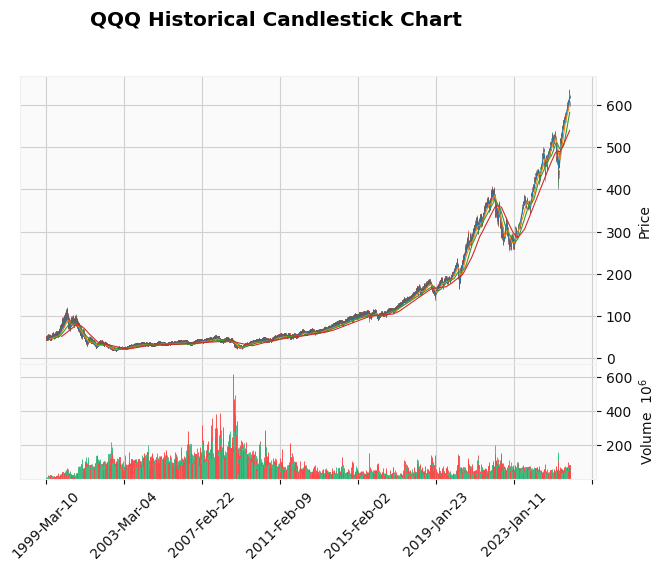

In [18]:
mpf.plot(
    df,
    type='candle',
    style='yahoo',
    volume=True,
    mav=(20,50,100,200),
    title='QQQ Historical Candlestick Chart'
)
